# Digipex Internship Task 01: COVID-19 Data Analysis

# Step 1 Upload dataset

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\sk mobile zone\Desktop\time-series-19-covid-combined.csv")
df

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
...,...,...,...,...,...,...,...,...
72085,2020-10-13,Zimbabwe,NaN,-19.015438,29.154857,8036,7632.0,230
72086,2020-10-14,Zimbabwe,NaN,-19.015438,29.154857,8055,7640.0,231
72087,2020-10-15,Zimbabwe,NaN,-19.015438,29.154857,8075,7669.0,231
72088,2020-10-16,Zimbabwe,NaN,-19.015438,29.154857,8099,7673.0,231


### 📄 Dataset Summary

This dataset provides daily global COVID-19 records, including confirmed cases, deaths, and recoveries.  
It contains data from various countries and regions along with location coordinates and dates.

The dataset has 8 columns and over 10,000 rows, making it suitable for time-series analysis and trend visualization.

### 📄 Column Discription

 This dataset is daily time series data of all the COVID 19 confirmed, recovered and death cases across different nations in the world. It consists of columns:

Date <- From 22/01/2020 to the current date.


Country/Region <- Countries affected by Covid-19.

 
Province/State <- Specific states in the Country.

Lat <- Latitude of the Country.

Long <- Longitude of the Country.

Confirmed <- Total Number of Confirmed Cases per day.

Recovered <- Total Number of Recovery Cases per day.

Deaths <- Total Number of Death Cases per day.






In [2]:
df.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.93911,67.709953,0,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            72090 non-null  object 
 1   Country/Region  72090 non-null  object 
 2   Province/State  21870 non-null  object 
 3   Lat             72090 non-null  float64
 4   Long            72090 non-null  float64
 5   Confirmed       72090 non-null  int64  
 6   Recovered       68310 non-null  float64
 7   Deaths          72090 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.4+ MB


In [4]:
df.columns

Index(['Date', 'Country/Region', 'Province/State', 'Lat', 'Long', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [5]:
df.isnull().sum()

Date                  0
Country/Region        0
Province/State    50220
Lat                   0
Long                  0
Confirmed             0
Recovered          3780
Deaths                0
dtype: int64

In [6]:
df.duplicated().sum()

0

## ⚠ Data Issues Identified

- Some values in Province/State and Recovered columns are missing (found via isnull().sum()).
- Date column is in object format and needs to be converted to datetime (found via df.info()).
- Dataset may contain duplicate rows (check with df.duplicated().sum()).
- Column names like Country/Region are long and can be simplified.

### 🧹  Step 2 : Data Cleaning
Below are the steps taken to clean and prepare the dataset for analysis.

In [7]:
# Convert "Date" from object to datetime format for time based analysis 
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            72090 non-null  datetime64[ns]
 1   Country/Region  72090 non-null  object        
 2   Province/State  21870 non-null  object        
 3   Lat             72090 non-null  float64       
 4   Long            72090 non-null  float64       
 5   Confirmed       72090 non-null  int64         
 6   Recovered       68310 non-null  float64       
 7   Deaths          72090 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 4.4+ MB


In [9]:
df.columns

Index(['Date', 'Country/Region', 'Province/State', 'Lat', 'Long', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [10]:
# rename columns for clarity and easier refrence
df.rename(columns = {
    "Country/Region":"Country",
    "Province/State":"Province"
}, inplace=True)

In [11]:
df.columns


Index(['Date', 'Country', 'Province', 'Lat', 'Long', 'Confirmed', 'Recovered',
       'Deaths'],
      dtype='object')

In [12]:
# Fill missing values in 'Recovered' with 0 (assumes unreported = 0)
df['Recovered'] = df['Recovered'].fillna(0)

# Fill missing province names with 'Unknown' to maintain consistency across all rows

df['Province'] = df['Province'].fillna('Unknown')

In [13]:
df

,Date,Country,Province,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,Unknown,33.939110,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,Unknown,33.939110,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,Unknown,33.939110,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,Unknown,33.939110,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,Unknown,33.939110,67.709953,0,0.0,0
...,...,...,...,...,...,...,...,...
72085,2020-10-13,Zimbabwe,Unknown,-19.015438,29.154857,8036,7632.0,230
72086,2020-10-14,Zimbabwe,Unknown,-19.015438,29.154857,8055,7640.0,231
72087,2020-10-15,Zimbabwe,Unknown,-19.015438,29.154857,8075,7669.0,231
72088,2020-10-16,Zimbabwe,Unknown,-19.015438,29.154857,8099,7673.0,231


In [31]:
# After filling
print("Missing values in 'Recovered' after filling:")
print(df['Recovered'].isnull().sum())

Missing values in 'Recovered' after filling:
0


In [32]:
# After filling: count how many rows now have 'Unknown'
print("Province value counts (after filling missing with 'Unknown'):")
print(df['Province'].value_counts().head())

Province value counts (after filling missing with 'Unknown'):
Province
Unknown             50220
Martinique            270
French Polynesia      270
French Guiana         270
Greenland             270
Name: count, dtype: int64


In [33]:
#removes duplicates rows 
df=df.drop_duplicates()

In [34]:
df.isnull().sum()

Date         0
Country      0
Province     0
Lat          0
Long         0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       72090 non-null  datetime64[ns]
 1   Country    72090 non-null  object        
 2   Province   72090 non-null  object        
 3   Lat        72090 non-null  float64       
 4   Long       72090 non-null  float64       
 5   Confirmed  72090 non-null  int64         
 6   Recovered  72090 non-null  float64       
 7   Deaths     72090 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 4.4+ MB


In [37]:
df.head()

,Date,Country,Province,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,Unknown,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,Unknown,33.93911,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,Unknown,33.93911,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,Unknown,33.93911,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,Unknown,33.93911,67.709953,0,0.0,0


## Step 3 Perform EDA Use Python (Pandas, NumPy, Seaborn, Matplotlib) or another data tool of your choice. Address:

What Is EDA (Exploratory Data Analysis)?

EDA helps you:

Understand your data

Find trends, patterns, and outliers

Check relationships between features

Prepare insights before building any model or drawing conclusions

## 1.What does the dataset describe?
The dataset provides a global time series of COVID-19 cases, including daily information about Confirmed cases, Deaths, Recoveries, and geographical data (Country, Province, Latitude, Longitude). It allows analysis of the pandemic's spread across time and location.

In [38]:
# View basic structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       72090 non-null  datetime64[ns]
 1   Country    72090 non-null  object        
 2   Province   72090 non-null  object        
 3   Lat        72090 non-null  float64       
 4   Long       72090 non-null  float64       
 5   Confirmed  72090 non-null  int64         
 6   Recovered  72090 non-null  float64       
 7   Deaths     72090 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 4.4+ MB


In [39]:
# Preview data
df.head()



,Date,Country,Province,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,Unknown,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,Unknown,33.93911,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,Unknown,33.93911,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,Unknown,33.93911,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,Unknown,33.93911,67.709953,0,0.0,0


In [40]:
# Summary stats
df.describe()

,Date,Lat,Long,Confirmed,Recovered,Deaths
count,72090,72090.000000,72090.000000,7.209000e+04,7.209000e+04,72090.000000
mean,2020-06-04 12:00:00.000000256,20.961559,23.343773,4.284619e+04,2.615992e+04,1610.020807
min,2020-01-22 00:00:00,-51.796300,-135.000000,0.000000e+00,0.000000e+00,0.000000
25%,2020-03-29 00:00:00,6.428055,-15.310100,1.600000e+01,0.000000e+00,0.000000
50%,2020-06-04 12:00:00,22.300000,20.939400,4.400000e+02,1.620000e+02,6.000000
75%,2020-08-11 00:00:00,41.153300,80.771797,4.688750e+03,1.803750e+03,89.000000
max,2020-10-17 00:00:00,71.706900,178.065000,8.106384e+06,6.524595e+06,219286.000000
std,NaN,24.882193,70.429778,3.257632e+05,2.064383e+05,10272.269230


This dataset provides a day-by-day global summary of COVID-19 cases.  
It includes details such as date, country, province, and the total number of confirmed, recovered, and death cases.  
Each row represents data for one region on one specific date.

## 2.What trends, patterns,or outliers exist?

# A) Line Plot:  A view Case growth trend over time.

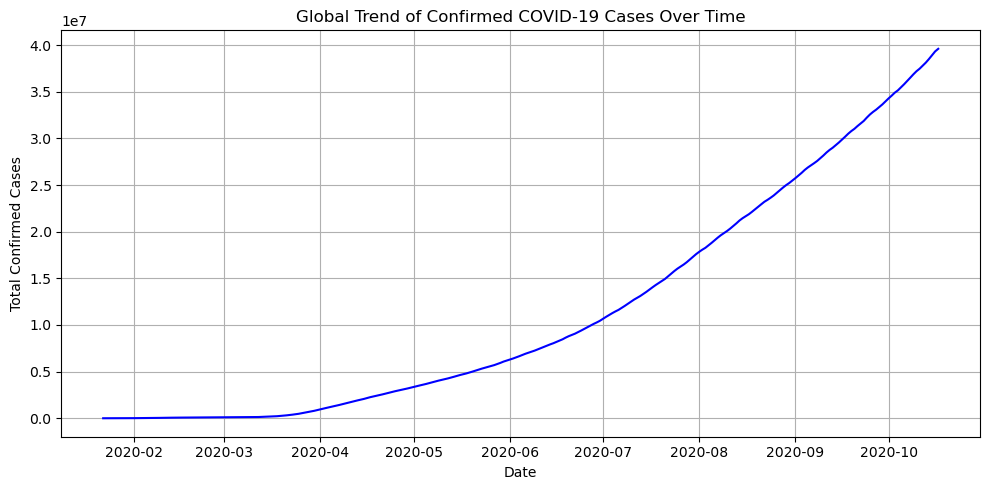

In [41]:
import matplotlib.pyplot as plt

# Group data by Date and sum the Confirmed cases for each day
trend_data = df.groupby('Date')['Confirmed'].sum()

# Plot line chart to show trend
plt.figure(figsize=(10, 5))
plt.plot(trend_data.index, trend_data.values, color='blue')
plt.title("Global Trend of Confirmed COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

 
This line graph helps us observe the trend of confirmed cases rising over time globally.

## b) Bar Chart:Compare top 10 Countries By confirmed covid 19 cases.

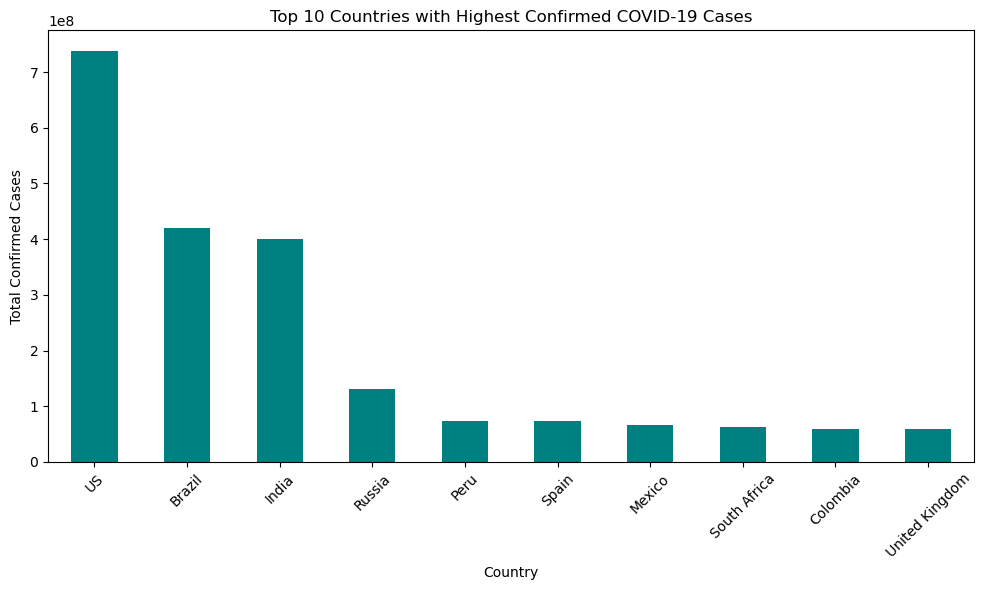

In [42]:
import matplotlib.pyplot as plt

# Step 1: Group by Country and sum the Confirmed cases
confirmed_by_country = df.groupby('Country')['Confirmed'].sum()

# Step 2: Sort countries by total confirmed cases (descending)
top_10 = confirmed_by_country.sort_values(ascending=False).head(10)

# Step 3: Plot the bar chart
plt.figure(figsize=(10, 6))  # Set chart size
top_10.plot(kind='bar', color='teal')

# Step 4: Add title and labels
plt.title("Top 10 Countries with Highest Confirmed COVID-19 Cases")
plt.xlabel("Country")
plt.ylabel("Total Confirmed Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart shows the *top 10 countries* with the *highest number of confirmed COVID-19 cases* on the latest date in the dataset.  
It shows the Pattern that some countries like USA, Brazil, India were much more affected than others.

# Detect outliers with  Boxplot

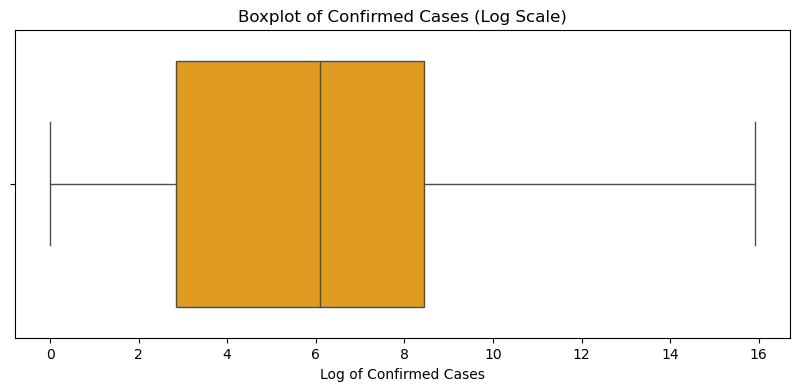

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Add log scale to see large values better
plt.figure(figsize=(10, 4))
sns.boxplot(x=np.log1p(df['Confirmed']), color='orange')  # log1p avoids log(0) error
plt.title("Boxplot of Confirmed Cases (Log Scale)")
plt.xlabel("Log of Confirmed Cases")
plt.show()

 ## C) Which features are correlated?


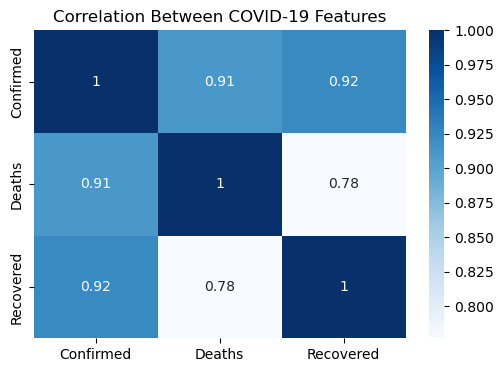

In [44]:
# Select only numerical columns
correlation_data = df[['Confirmed', 'Deaths', 'Recovered']]

# Create a correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_data.corr(), annot=True, cmap='Blues')
plt.title("Correlation Between COVID-19 Features")
plt.show()



What this shows:

Confirmed & Deaths → strongly positively correlated

Confirmed & Recovered → also positively correlated

This means that more confirmed cases often result in more deaths and more recoveries.

In [45]:
df.to_csv("Cleaned_covid_data.csv",index= False)

In [46]:
import os
print("Saved:", os.path.exists("cleaned_covid_data.csv"))

Saved: True
